In [1]:
from tabascal.jax.observation import Observation

In [2]:
from tabascal.utils.tools import load_antennas

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [177]:
t_0 = 440.
dT = 2.
N_t = 900./dT

N_int = 8

freq_start = 1.3e9
freq_end = 1.3e9
N_freq = 1

SEFD = 420.

times = np.arange(t_0, t_0 + N_t * dT, dT)
freqs = np.linspace(freq_start, freq_end, N_freq)

ants_enu = load_antennas()

chunksize = 100.

obs = Observation(
    latitude=-30.0,
    longitude=21.0,
    elevation=1050.0,
    ra=27.,
    dec=15.,
    times=times,
    freqs=freqs,
    SEFD=SEFD,
    ENU_array=ants_enu,
    n_int_samples=N_int,
    max_chunk_MB=chunksize,
)

obs.addSatelliteRFI(
    Pv=6e-4, 
    elevation=20200e3,
    inclination=55., 
    lon_asc_node=21., 
    periapsis=7.)

obs.addSatelliteRFI(
    Pv=2*6e-4, 
    elevation=19140e3,
    inclination=64.8, 
    lon_asc_node=17., 
    periapsis=1.)

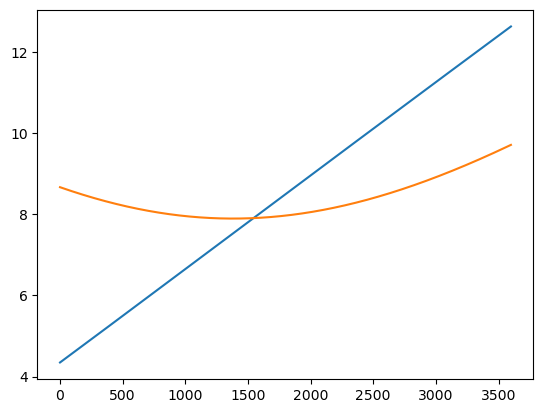

In [178]:
for i in range(obs.n_rfi_satellite):
    plt.plot(obs.rfi_satellite_ang_sep[i][0,:,0]);

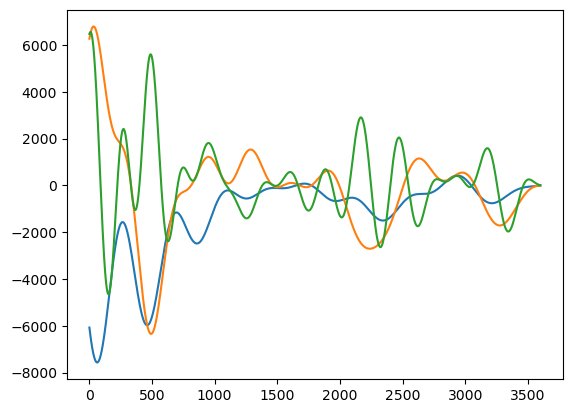

In [179]:
plt.plot(obs.vis_rfi[:,:3,0].real)
# plt.plot(obs.vis_rfi[:,0,0].imag)

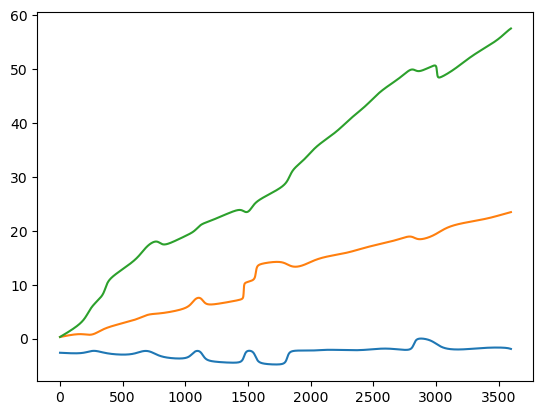

In [180]:
plt.plot(np.unwrap(np.angle(obs.vis_rfi[:,:3,0]), axis=0, discont=0.0))

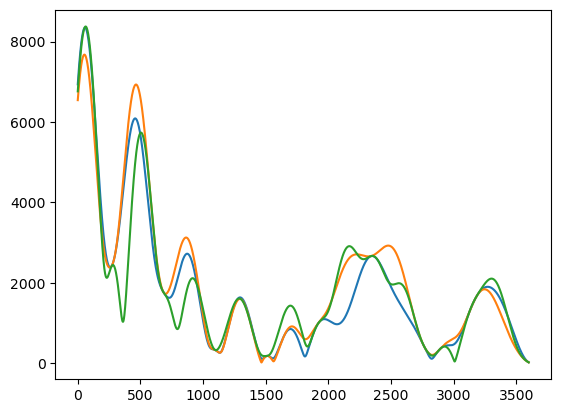

In [181]:
plt.plot(np.abs(obs.vis_rfi[:,:3,0]))

In [182]:
t_0 = 440.
dT = 2.
N_t = 900./dT

N_int = 8

freq_start = 1.3e9
freq_end = 1.3e9
N_freq = 1

SEFD = 420.

times = np.arange(t_0, t_0 + N_t * dT, dT)
freqs = np.linspace(freq_start, freq_end, N_freq)

ants_enu = load_antennas()

chunksize = 100.

obs = Observation(
    latitude=-30.0,
    longitude=21.0,
    elevation=1050.0,
    ra=27.,
    dec=15.,
    times=times,
    freqs=freqs,
    SEFD=SEFD,
    ENU_array=ants_enu,
    n_int_samples=N_int,
    max_chunk_MB=chunksize,
)

obs.addSatelliteRFI(
    Pv=6e-4, 
    elevation=20200e3,
    inclination=55., 
    lon_asc_node=21., 
    periapsis=7.)

# obs.addSatelliteRFI(
#     Pv=2*6e-4, 
#     elevation=19140e3,
#     inclination=64.8, 
#     lon_asc_node=17., 
#     periapsis=1.)

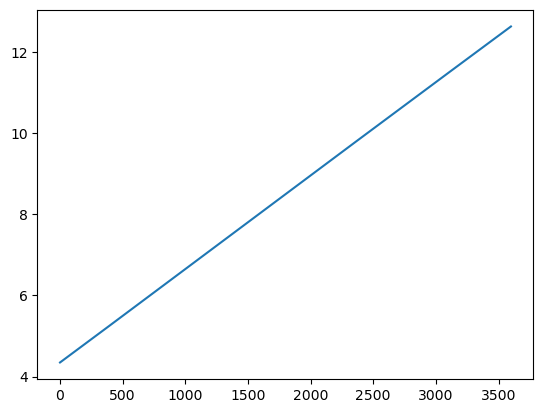

In [183]:
for i in range(obs.n_rfi_satellite):
    plt.plot(obs.rfi_satellite_ang_sep[i][0,:,0]);

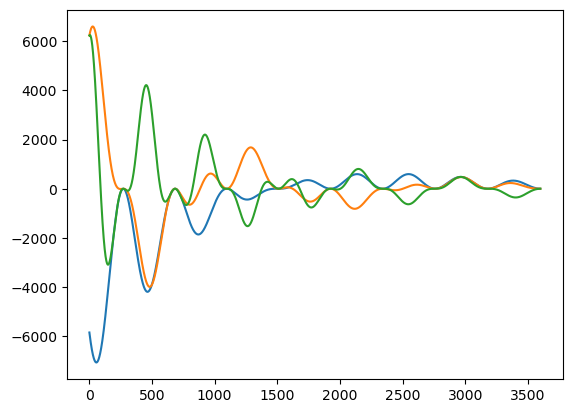

In [184]:
plt.plot(obs.vis_rfi[:,:3,0].real)
# plt.plot(obs.vis_rfi[:,:3,0].imag)

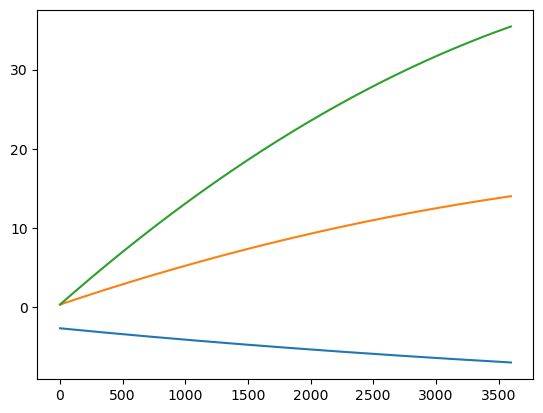

In [185]:
plt.plot(np.unwrap(np.angle(obs.vis_rfi[:,:3,0]), axis=0, discont=0.0))

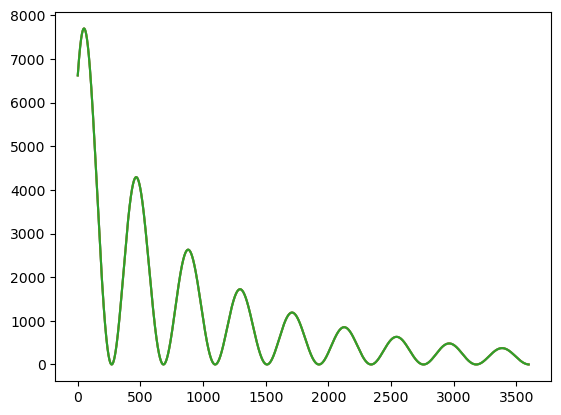

In [186]:
plt.plot(np.abs(obs.vis_rfi[:,:3,0]))

In [187]:
t_0 = 440.
dT = 2.
N_t = 900./dT

N_int = 8

freq_start = 1.3e9
freq_end = 1.3e9
N_freq = 1

SEFD = 420.

times = np.arange(t_0, t_0 + N_t * dT, dT)
freqs = np.linspace(freq_start, freq_end, N_freq)

ants_enu = load_antennas()

chunksize = 100.

obs = Observation(
    latitude=-30.0,
    longitude=21.0,
    elevation=1050.0,
    ra=27.,
    dec=15.,
    times=times,
    freqs=freqs,
    SEFD=SEFD,
    ENU_array=ants_enu,
    n_int_samples=N_int,
    max_chunk_MB=chunksize,
)

# obs.addSatelliteRFI(
#     Pv=6e-4, 
#     elevation=20200e3,
#     inclination=55., 
#     lon_asc_node=21., 
#     periapsis=7.)

obs.addSatelliteRFI(
    Pv=2*6e-4, 
    elevation=19140e3,
    inclination=64.8, 
    lon_asc_node=17., 
    periapsis=1.)

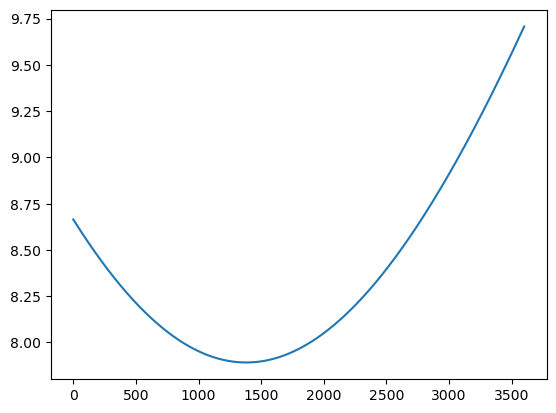

In [188]:
for i in range(obs.n_rfi_satellite):
    plt.plot(obs.rfi_satellite_ang_sep[i][0,:,0]);

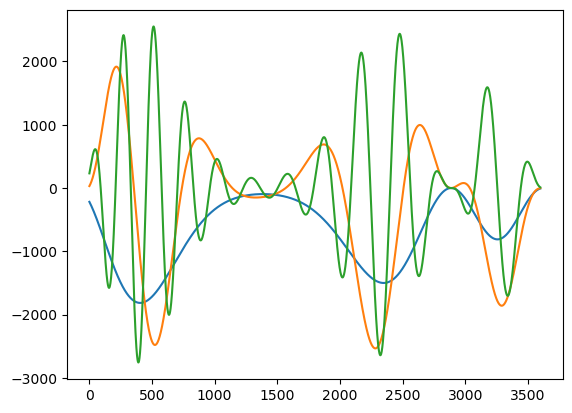

In [192]:
plt.plot(obs.vis_rfi[:,:3,0].real)
# plt.plot(obs.vis_rfi[:,:3,0].imag)

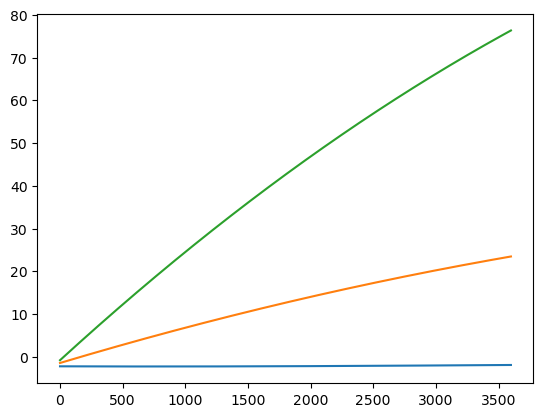

In [190]:
plt.plot(np.unwrap(np.angle(obs.vis_rfi[:,:3,0]), axis=0, discont=0.0))

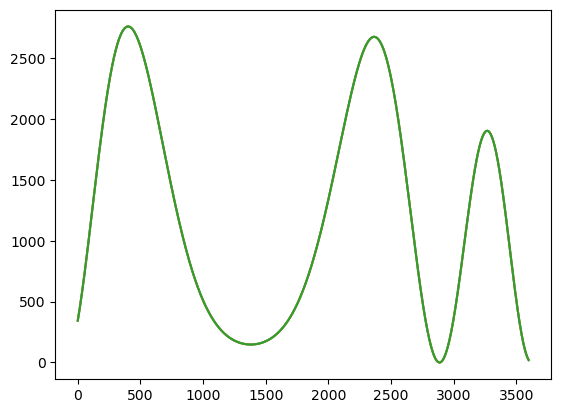

In [191]:
plt.plot(np.abs(obs.vis_rfi[:,:3,0]))

Text(0, 0.5, 'Azimuth [deg]')

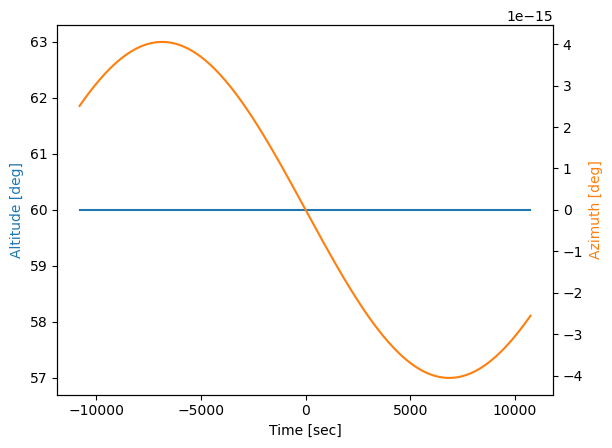

In [22]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(obs.times, 90-obs.altaz[:,0], color='tab:blue')
ax2.plot(obs.times, obs.altaz[:,1], color='tab:orange')

ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('Altitude [deg]', color='tab:blue')
ax2.set_ylabel('Azimuth [deg]', color='tab:orange')

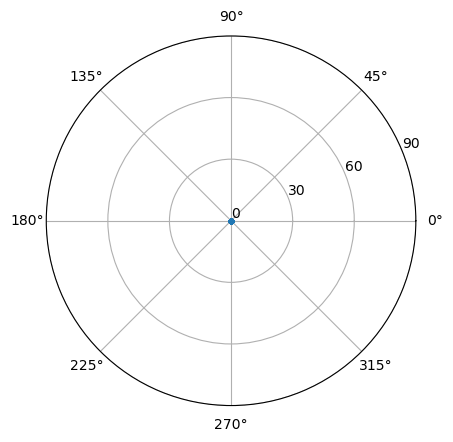

In [33]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(90-obs.altaz[:,0], obs.altaz[:,1], '.')
ax.set_rmax(90)
ax.set_rticks([0., 30., 60., 90.])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

In [38]:
ant = obs.ants_xyz[:,0]

In [39]:
from tabascal.jax.coordinates import radec_to_XYZ

In [47]:
trgt = radec_to_XYZ(obs.ra, obs.dec)

In [59]:
ant2trgt = trgt[None,:] - ant/np.linalg.norm(ant, axis=-1, keepdims=True)
ant2trgt /= np.linalg.norm(ant2trgt, axis=-1, keepdims=True)

In [ ]:
from jax.

In [69]:
alt = np.rad2deg(np.arccos(ant2trgt[:,-1]))
az = np.rad2deg(np.arctan2(ant2trgt[:,1], ant2trgt[:,0]))

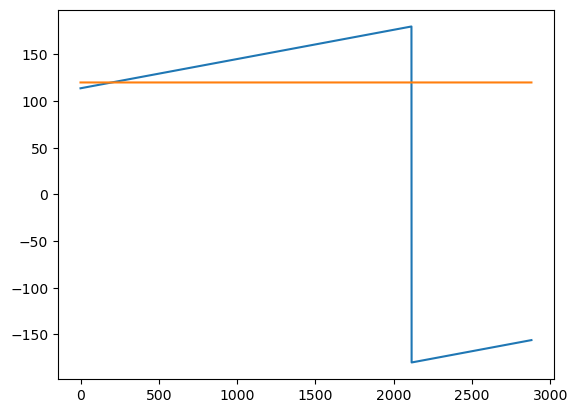

In [70]:
plt.plot(az)
plt.plot(alt)